Simple Moving Average Filter (Media móvil simple)
La ecuación en diferencia para este filtro es la siguiente:

y[n] = y[n-1] + (1 / W) * (x[n] - x[n-W])

W es el tamaño de la ventana deslizante.

y[n] es la salida actual.

y[n-1] es la salida anterior.

x[n] es la entrada actual.

x[n-W] es la entrada que sale de la ventana.

Este filtro actúa como un filtro pasabajos, suavizando la señal al promediar un número fijo de muestras y atenuar los cambios rápidos.

#Ejercicio 13
- Implementar este filtro con distintos tamaños de ventana.
- Comparar con el Media móvil exponencial
- Realizar un análisis del espectro de frecuencias.
- Plotear la señal original y la filtrada superpuestas para notar el suavizado.

## Implementar el filtro de media móvil simple (SMA)

### Subtarea:
Crear una función que tome como entrada la señal `x` y un tamaño de ventana `W` y devuelva la señal filtrada `y` utilizando la ecuación diferencial proporcionada.


In [8]:
import numpy as np

def simple_moving_average(x, W):
    """
    Aplica un filtro de Media Móvil Simple (SMA) a una señal usando una ecuación de diferencia.

    Args:
        x: La señal de entrada (lista o arreglo NumPy).
        W: El tamaño de la ventana (entero).

    Returns:
        La señal filtrada (arreglo NumPy).
    """
    n = len(x)
    y = np.zeros(n)

    # Manejar las primeras muestras donde n < W
    for i in range(W):
        y[i] = np.mean(x[:i+1])

    # Aplicar la ecuación de diferencia para n >= W
    for i in range(W, n):
        y[i] = y[i-1] + (1 / W) * (x[i] - x[i-W])

    return y

## Implementar el filtro de media móvil exponencial (EMA)

### Subtarea:
Implementar el filtro de media móvil exponencial (EMA) para la comparación.


In [9]:
def exponential_moving_average(x, alpha):
    """
    Aplica un filtro de Media Móvil Exponencial (EMA) a una señal.

    Args:
        x: La señal de entrada (lista o arreglo NumPy).
        alpha: El factor de suavizado (flotante entre 0 y 1).

    Returns:
        La señal filtrada (arreglo NumPy).
    """
    n = len(x)
    y = np.zeros(n)

    # Inicializar el primer elemento de salida
    y[0] = x[0]

    # Implementar la fórmula de la EMA
    for i in range(1, n):
        y[i] = alpha * x[i] + (1 - alpha) * y[i-1]

    return y

## Generar una señal de prueba

### Subtarea:
Crear una señal de muestra para aplicar los filtros. Esta podría ser una señal simple con algo de ruido.

In [10]:
# Generar un vector de tiempo
duration = 10  # segundos
num_points = 1000
time = np.linspace(0, duration, num_points)

# Crear una señal base (ej. una combinación de ondas sinusoidales)
frequency1 = 2  # Hz
frequency2 = 5  # Hz
amplitude1 = 1.0
amplitude2 = 0.5
base_signal = amplitude1 * np.sin(2 * np.pi * frequency1 * time) + amplitude2 * np.sin(2 * np.pi * frequency2 * time)

# Añadir ruido aleatorio
noise_level = 0.3
noise = noise_level * np.random.randn(num_points)
test_signal = base_signal + noise

# Mostrar los primeros valores de tiempo y test_signal
print("Tiempo (primeros 10):", time[:10])
print("Señal de Prueba (primeros 10):", test_signal[:10])

Tiempo (primeros 10): [0.         0.01001001 0.02002002 0.03003003 0.04004004 0.05005005
 0.06006006 0.07007007 0.08008008 0.09009009]
Señal de Prueba (primeros 10): [0.05500754 0.3674311  0.41536023 0.80461813 1.32150233 1.16379211
 1.07354245 1.15144657 1.0551515  0.5319473 ]



## Aplicar los filtros

### Subtarea:
Aplicar los filtros SMA y EMA a la señal de prueba utilizando diferentes tamaños de ventana y parámetros.


In [31]:
# Definir tamaños de ventana para SMA
sma_window_sizes = [5, 50, 100]
sma_filtered_signals = {}

# Aplicar filtro SMA para cada tamaño de ventana
for W in sma_window_sizes:
    sma_filtered_signals[W] = simple_moving_average(test_signal, W)

# Definir factores de suavizado para EMA
ema_smoothing_factors = [0.1, 0.05, 0.01]
ema_filtered_signals = {}

# Aplicar filtro EMA para cada factor de suavizado
for alpha in ema_smoothing_factors:
    ema_filtered_signals[alpha] = exponential_moving_average(test_signal, alpha)

# Imprimir confirmación de filtrado
print("Filtrado SMA completado para tamaños de ventana:", sma_window_sizes)
print("Filtrado EMA completado para factores de suavizado:", ema_smoothing_factors)

Filtrado SMA completado para tamaños de ventana: [5, 50, 100]
Filtrado EMA completado para factores de suavizado: [0.1, 0.05, 0.01]


## Visualizar las señales

### Subtarea:
Represente la señal original y las señales filtradas de los filtros SMA y EMA en el mismo gráfico para comparar visualmente el efecto de suavizado.


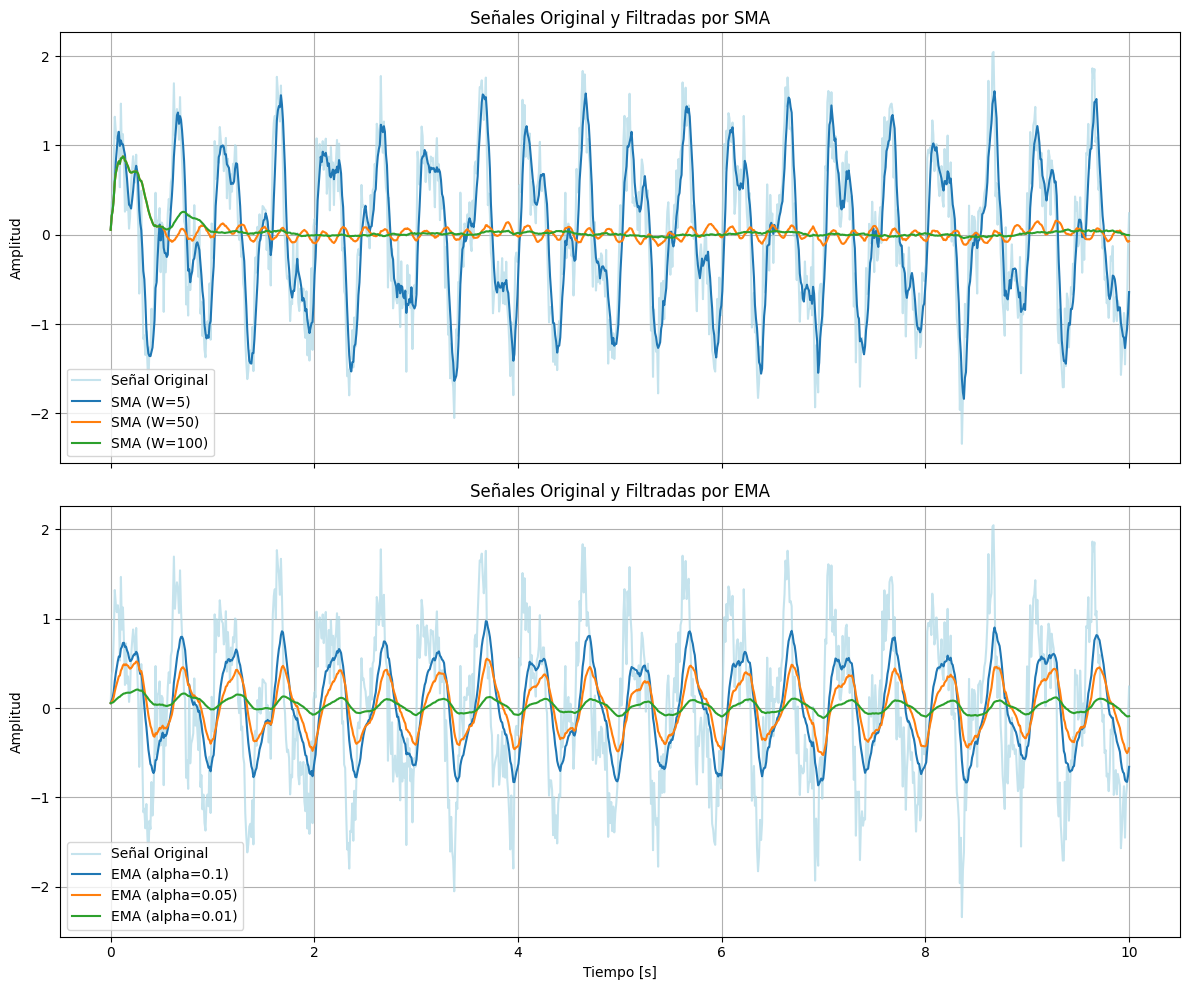

In [32]:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Original and SMA Filtered Signals
axes[0].plot(time, test_signal, label='Señal Original', color='lightblue', alpha=0.7)
for W, filtered_signal in sma_filtered_signals.items():
    axes[0].plot(time, filtered_signal, label=f'SMA (W={W})')
axes[0].set_title('Señales Original y Filtradas por SMA')
axes[0].set_ylabel('Amplitud')
axes[0].legend()
axes[0].grid(True)

# Plot Original and EMA Filtered Signals
axes[1].plot(time, test_signal, label='Señal Original', color='lightblue', alpha=0.7)
for alpha, filtered_signal in ema_filtered_signals.items():
    axes[1].plot(time, filtered_signal, label=f'EMA (alpha={alpha})')
axes[1].set_title('Señales Original y Filtradas por EMA')
axes[1].set_xlabel('Tiempo [s]')
axes[1].set_ylabel('Amplitud')
axes[1].legend()
axes[1].grid(True)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

## Calcular y visualizar el espectro de frecuencias

### Subtarea:
Calcular y representar gráficamente el espectro de frecuencias de las señales original y filtrada para ver cómo los filtros afectan las diferentes frecuencias.

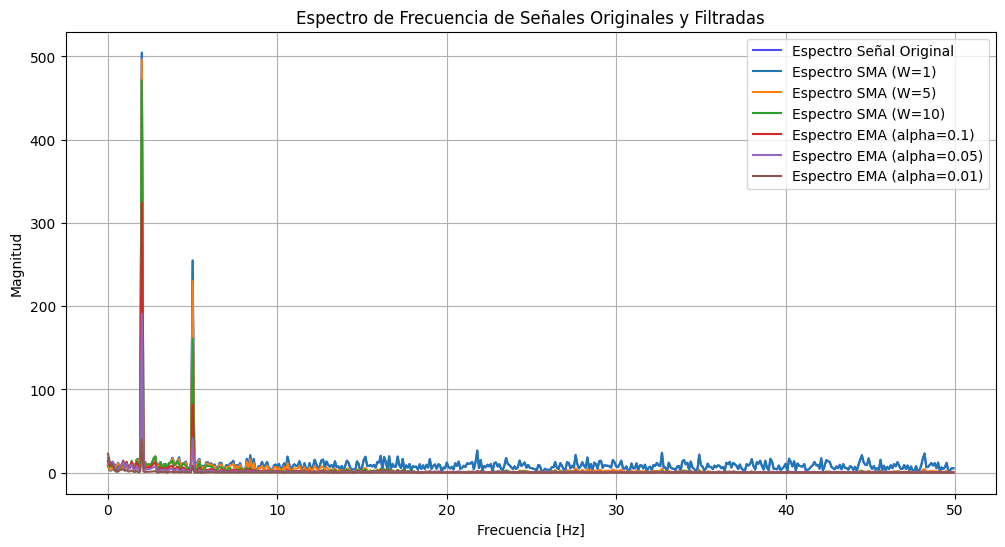

In [25]:
import scipy.fft as fft

# Calculate sampling frequency
fs = num_points / duration

# Compute FFT of the original signal
test_signal_fft = fft.fft(test_signal)
freqs = fft.fftfreq(num_points, 1/fs)

# Calculate magnitude spectrum (first half)
test_signal_magnitude = np.abs(test_signal_fft)[:num_points // 2]
freqs_half = freqs[:num_points // 2]

# Create plot for frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(freqs_half, test_signal_magnitude, label='Espectro Señal Original', color='blue', alpha=0.7)

# Iterate through SMA filtered signals and plot their spectrums
for W, filtered_signal in sma_filtered_signals.items():
    filtered_signal_fft = fft.fft(filtered_signal)
    filtered_signal_magnitude = np.abs(filtered_signal_fft)[:num_points // 2]
    plt.plot(freqs_half, filtered_signal_magnitude, label=f'Espectro SMA (W={W})')

# Iterate through EMA filtered signals and plot their spectrums
for alpha, filtered_signal in ema_filtered_signals.items():
    filtered_signal_fft = fft.fft(filtered_signal)
    filtered_signal_magnitude = np.abs(filtered_signal_fft)[:num_points // 2]
    plt.plot(freqs_half, filtered_signal_magnitude, label=f'Espectro EMA (alpha={alpha})')

# Add plot details
plt.title('Espectro de Frecuencia de Señales Originales y Filtradas')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.legend()
plt.grid(True)
plt.show()

## Comparar los filtros

### Subtarea:
Analizar y comparar las características de los filtros SMA y EMA según las visualizaciones.

Análisis y Comparación de las Características de los Filtros SMA y EMA:

Análisis en el Dominio del Tiempo:
-----------------------
Filtro SMA:
- Efecto de Suavizado: El filtro SMA suaviza eficazmente el ruido en la señal. El suavizado aumenta con tamaños de ventana (W) más grandes.
- Retardo: El filtro SMA introduce un retardo en la señal filtrada en comparación con la señal original. El retardo aumenta con tamaños de ventana más grandes.
- Con W=10, la señal sigue la señal original relativamente de cerca pero con cierta reducción de ruido.
- Con W=50, el suavizado es más significativo y el retardo es más notable.
- Con W=100, la señal está muy suavizada y el retardo es bastante pronunciado.

Filtro EMA:
- Efecto de Suavizado: El filtro EMA también suaviza el ruido. El suavizado aumenta con factores de suavizado (alpha) más pequeños.
- Retardo: El filtro EMA también introduce un retardo. El retardo aumenta con factores de suavizado más pequeños.
- Con alpha=0.1, la señal muestra un suavizado moderado y un retardo relativamente menor en comparación con valores de alpha más pequeños.
- Con alpha=0.05, el suavizado es más pronunciado y el retardo es más notable.
- Con alpha=0.01, la señal está significativamente suavizada y el retardo es bastante sustancial.

Comparación (Dominio del Tiempo):
- Ambos filtros proporcionan suavizado, pero la naturaleza del suavizado y el retardo difiere.
- EMA tiende a responder más rápido a los cambios en la señal en comparación con SMA con un nivel de suavizado comparable, especialmente para transiciones bruscas.
- El retardo en SMA es un retraso fijo basado en el tamaño de la ventana, mientras que el retardo en EMA es más adaptativo y depende del valor de alpha y la dinámica de la señal.

Análisis en el Dominio de la Frecuencia:
----------------------------
Filtro SMA:
- Respuesta en Frecuencia: El filtro SMA actúa como un filtro pasabajos, atenuando las frecuencias más altas. El grado de atenuación aumenta con tamaños de ventana más grandes.
- El espectro muestra muescas en ciertas frecuencias, características de la respuesta en frecuencia tipo sinc del SMA.
- Valores de W más grandes resultan en una banda de paso más estrecha y una atenuación más significativa de las frecuencias más altas.

Filtro EMA:
- Respuesta en Frecuencia: El filtro EMA también actúa como un filtro pasabajos, atenuando las frecuencias más altas. El grado de atenuación aumenta con factores de suavizado (alpha) más pequeños.
- La respuesta en frecuencia del filtro EMA se caracteriza por una disminución gradual de las frecuencias más altas.
- Valores de alpha más pequeños resultan en una banda de paso más estrecha y una atenuación más significativa de las frecuencias más altas.

Comparación (Dominio de la Frecuencia):
- Ambos filtros reducen eficazmente la magnitud de los componentes de frecuencia más alta, incluido el ruido.
- El filtro SMA tiene una respuesta en frecuencia más abrupta con muescas distintas, mientras que el filtro EMA tiene una disminución más suave y gradual.
- EMA generalmente proporciona una respuesta en frecuencia más suave que SMA, lo que puede ser deseable en algunas aplicaciones.

Resumen General:
------------------
- Tanto los filtros SMA como EMA son efectivos para suavizar señales ruidosas al actuar como filtros pasabajos.
- SMA introduce un retardo fijo y tiene una respuesta en frecuencia con muescas. Es simple de implementar y entender.
- EMA introduce un retardo más adaptativo y tiene una respuesta en frecuencia más suave. Da más peso a los datos recientes, lo que lo hace más sensible a los cambios de señal que SMA para un nivel de suavizado similar.
- La elección entre SMA y EMA, y sus respectivos parámetros, depende de los requisitos específicos de la aplicación, incluido el nivel de suavizado deseado, el retardo aceptable y la naturaleza del contenido de frecuencia de la señal.

## Resumen:

### Hallazgos Clave del Análisis de Datos

* Tanto los filtros de Media Móvil Simple (SMA) como los de Media Móvil Exponencial (EMA) suavizan eficazmente las señales ruidosas actuando como filtros paso bajo.
* El efecto de suavizado del filtro SMA aumenta con tamaños de ventana mayores (W), mientras que el del filtro EMA aumenta con factores de suavizado menores (alfa).
* Ambos filtros introducen un retardo en la señal filtrada en comparación con la señal original. El retardo en SMA es fijo y depende del tamaño de la ventana, mientras que el retardo en EMA es más adaptativo y depende del valor alfa y la dinámica de la señal.
* El filtro EMA tiende a responder más rápidamente a los cambios en la señal en comparación con el filtro SMA, con un nivel de suavizado comparable.
* En el dominio de la frecuencia, ambos filtros atenúan las frecuencias más altas. La respuesta en frecuencia del filtro SMA muestra cortes de señal marcados y una caída más abrupta, mientras que el filtro EMA presenta una caída más suave y gradual en las frecuencias más altas.

### Perspectivas o próximos pasos

* La elección entre SMA y EMA depende de los requisitos específicos de la aplicación en cuanto al nivel de suavizado deseado, el retardo aceptable y la naturaleza del contenido de frecuencia de la señal.
* Un análisis más detallado podría implicar la medición cuantitativa del efecto de suavizado y el retardo para diferentes parámetros y la comparación de los filtros según métricas como el error cuadrático medio o la correlación cruzada.
